# Punto 1 - Tarea 2 - Miguel Rios Tangarife

In [1]:
#Traemos las librerías que vamos a usar
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
#Descarga de las imagenes
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [5]:
#Procesamiento de las imagenes
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

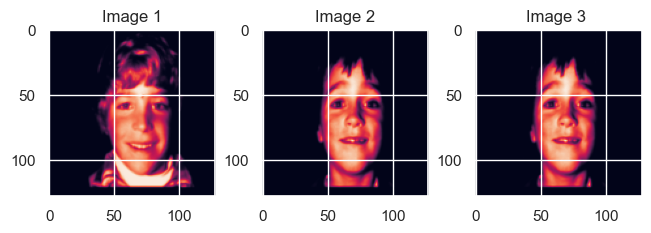

In [6]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

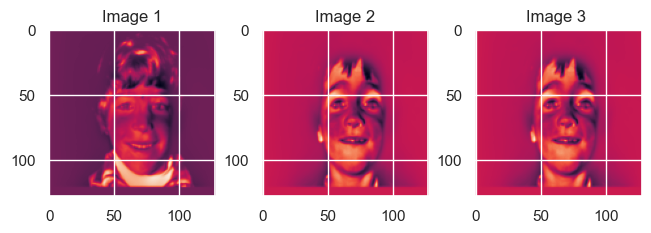

In [9]:
#Centramos los datos
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

## Mean face 

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

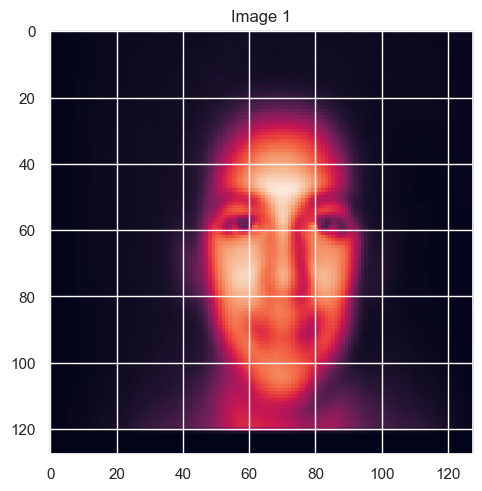

In [10]:
plot_1_images(X_mean)

In [12]:
#Cuantas imagenes hay y cada una tiene 16384 pixeles
X.shape

(836, 16384)

In [13]:
#Aplicamos PCA con 200 componentes inicialmente
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [14]:
#Calculamos los eigen values
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [15]:
eigen_values

array([7.82874099e+06, 2.79218242e+06, 1.87584750e+06, 1.01540056e+06,
       9.24370903e+05, 7.77615395e+05, 6.17176446e+05, 4.47762417e+05,
       3.95202043e+05, 3.07405808e+05, 2.61632367e+05, 2.52591493e+05,
       2.21710659e+05, 1.92148195e+05, 1.76179065e+05, 1.71339383e+05,
       1.60110846e+05, 1.53715440e+05, 1.43920577e+05, 1.33257947e+05,
       1.25658609e+05, 1.19716213e+05, 1.14295537e+05, 1.09219492e+05,
       1.03853851e+05, 9.44351739e+04, 8.76411343e+04, 8.72964454e+04,
       8.08854452e+04, 7.84207853e+04, 7.43412132e+04, 7.13903132e+04,
       6.91630898e+04, 6.63478402e+04, 6.48772863e+04, 6.16745188e+04,
       5.97931617e+04, 5.75605138e+04, 5.47942865e+04, 5.42893844e+04,
       5.27881410e+04, 5.15702982e+04, 5.09243000e+04, 4.99935867e+04,
       4.80341981e+04, 4.63456921e+04, 4.43467678e+04, 4.21935813e+04,
       4.18004113e+04, 4.07855337e+04, 3.84321941e+04, 3.77436199e+04,
       3.74412504e+04, 3.64935168e+04, 3.59153319e+04, 3.48466603e+04,
      

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

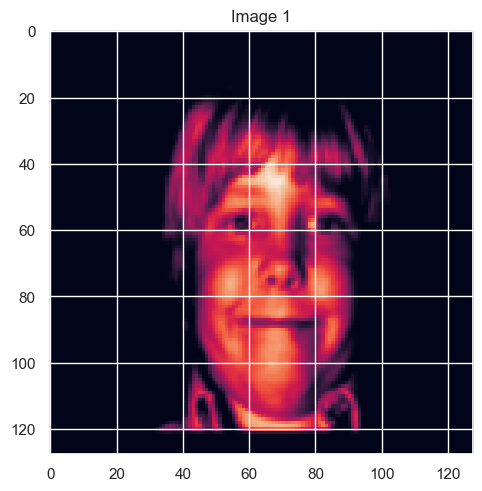

In [31]:
#Visualizamos la primer imagen
plot_1_images(X[0])

## Reconstruir imagen - primer imagen

In [35]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[0].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (836, 200)
Eigenvectores (200, 16384)
[-4.78824301e-11 -2.62715792e-11 -7.87118016e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [36]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

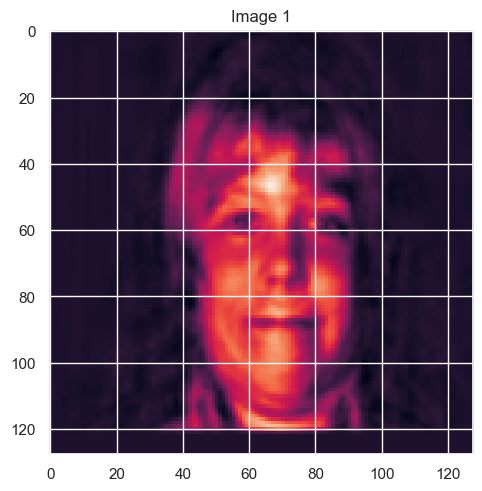

In [37]:
plot_1_images(X_mean + face_1.sum(axis=0) )

(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

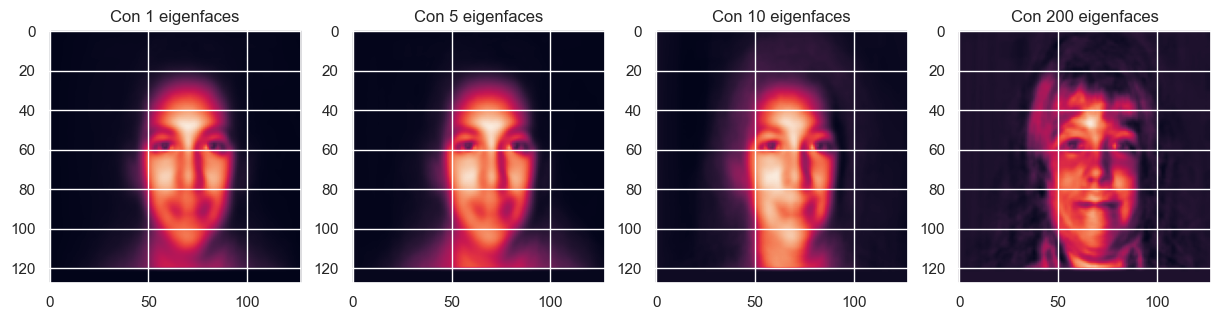

In [39]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                      eigen_faces[:5,:]),
                               axis=0)


face_10 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:200],
                                     eigen_faces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

In [42]:
#las componentes que explican el 90% de la varianza 
#y por último con el numero de componentes que tiene el 99% de la varianza.

In [43]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

In [44]:
n_components_90 = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1

In [45]:
n_components_96 = np.where(explained_variance_ratio_cumulative >= 0.96)[0][0] + 1

In [46]:
print("componentes que explican el 90%: ",n_components_90)
print("componentes que explican el 96%: ",n_components_96)

componentes que explican el 90%:  61
componentes que explican el 96%:  154


(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

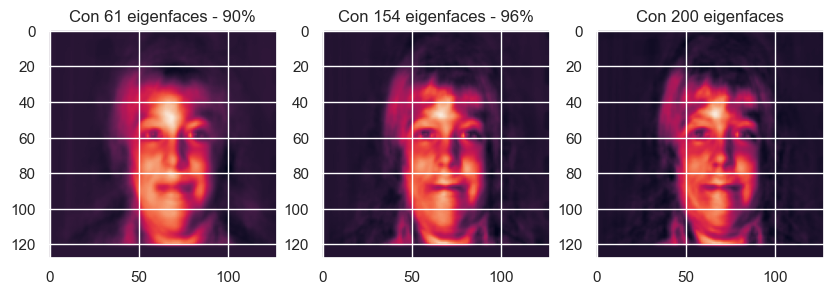

In [47]:
#
face_61 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:61],
                                 eigen_faces[:61,:]),
                            axis=0)
face_154 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:154],
                                      eigen_faces[:154,:]),
                               axis=0)
fig, ax = plt.subplots(1,3,figsize=(10,10))
plot_1_images(face_61,ax=ax[0],label="Con 61 eigenfaces - 90%")
plot_1_images(face_154,ax=ax[1],label="Con 154 eigenfaces - 96%")
plot_1_images(face_200,ax=ax[2],label="Con 200 eigenfaces")

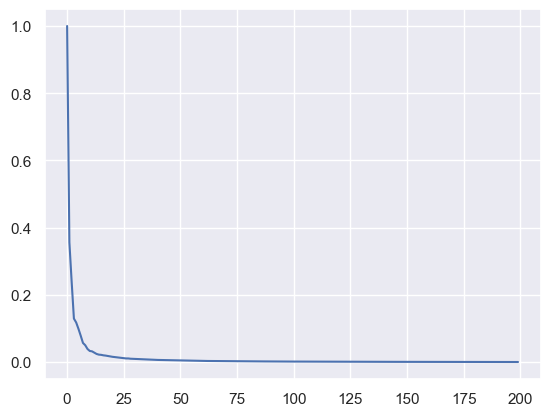

In [48]:
#De esta gráfica podemos observar que aproximadamente a partir del 75 
# ya no hay variaciones muy grandes
plt.plot(range(0,200), eigen_values/eigen_values[0])

## Reconstruir imagen - Cuarta imagen

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

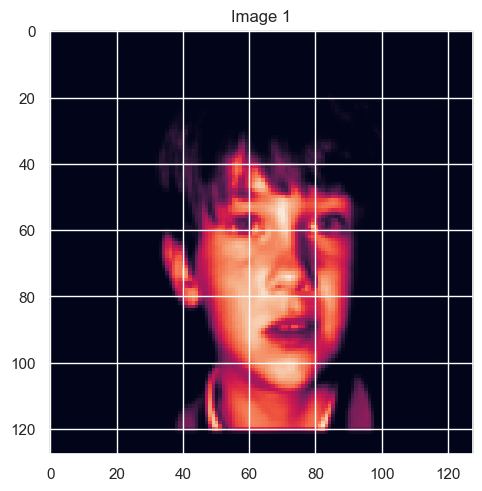

In [50]:
#Visualizamos la cuarta imagen
plot_1_images(X[3])

Componentes (836, 200)
Eigenvectores (200, 16384)
[ 1.21574671e-11 -7.57253218e-12 -4.46675275e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

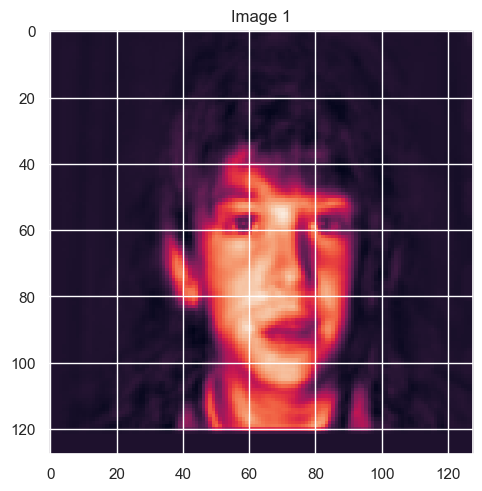

In [54]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_4 = np.dot(X_reduced[3].reshape(1,-1),eigen_faces)
print(face_4.sum(axis=0))

eigen_faces[0].shape
face_4 = np.dot(X_reduced[3].reshape(1,-1),eigen_faces)
face_4.shape

plot_1_images(X_mean + face_4.sum(axis=0) )


(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

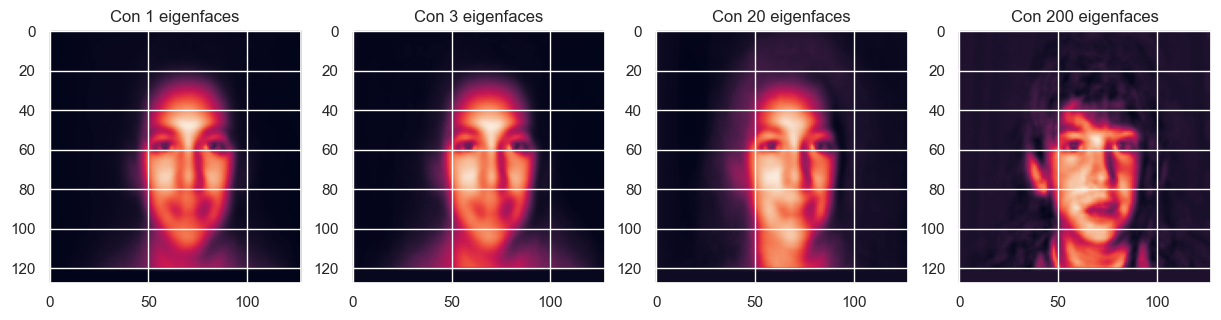

In [55]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:1],
                                 eigen_faces[:1,:]),
                            axis=0)
face_3 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:3],
                                      eigen_faces[:3,:]),
                               axis=0)


face_20 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:20],
                                      eigen_faces[:20,:]),
                               axis=0)

face_200 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:200],
                                     eigen_faces[:200,:]),
                              axis=0)
fig, ax = plt.subplots(1,4,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 3 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 20 eigenfaces")
plot_1_images(face_200,ax=ax[3],label="Con 200 eigenfaces")

In [56]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components_85 = np.where(explained_variance_ratio_cumulative >= 0.85)[0][0] + 1
n_components_96 = np.where(explained_variance_ratio_cumulative >= 0.96)[0][0] + 1
print("componentes que explican el 90%: ",n_components_90)
print("componentes que explican el 96%: ",n_components_96)

componentes que explican el 90%:  61
componentes que explican el 96%:  154


(None, <Axes: title={'center': 'Con 200 eigenfaces'}>)

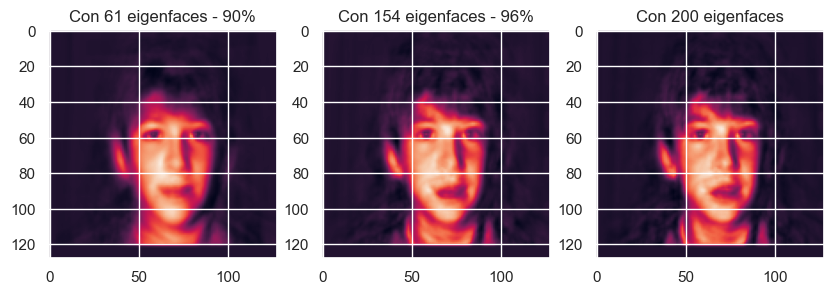

In [57]:
face_61 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:61],
                                 eigen_faces[:61,:]),
                            axis=0)
face_154 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:154],
                                      eigen_faces[:154,:]),
                               axis=0)
fig, ax = plt.subplots(1,3,figsize=(10,10))
plot_1_images(face_61,ax=ax[0],label="Con 61 eigenfaces - 90%")
plot_1_images(face_154,ax=ax[1],label="Con 154 eigenfaces - 96%")
plot_1_images(face_200,ax=ax[2],label="Con 200 eigenfaces")